In [1]:
from models_new_test.decoder_relight import ReconstructionLayer
import numpy as np
from models_new_test.utils import UVSampleLayer
import skimage.io as io
import torch
import matplotlib.pyplot as plt
from datasets.utils import createDataLoader

In [2]:
model = ReconstructionLayer('./models_new_test/model_config.json').cuda()

In [3]:
sample = UVSampleLayer('./models_new_test/model_config.json')

In [21]:
test = np.asarray([1.084125496282453138e+00,
-4.642676300617186724e-01,
2.679669346194941126e-01,
-6.218447693376460972e-01,
3.030269583891490037e-01,
-1.991061409014726058e-01,
-6.162944418511027977e-02,
-3.176699976873690878e-01,
1.920509612235956343e-01]).reshape(1,1,9) / 3

In [22]:
albedo = sample(io.imread('../eval_data/results/facewarehouse/Tester_2_pose_15_albedo.jpg')[None,...].astype(np.float32) / 255.0)
param = np.load('../eval_data/facewarehouse/outputs/params.npy')[None,20,:].astype(np.float32)
# params = np.load('../eval_data/MySelected/outputs/params.npy')
# test = np.asarray([1.084125496282453138e+00,-4.642676300617166185e-01,2.837846795150648915e-02,6.765292733937575687e-01
# ,-3.594067725393816914e-01,4.790996460111427574e-02,-2.280054643781863066e-01,-8.125983081159608712e-02,2.881082012687687932e-01]).reshape(1,1,9)
test = np.repeat(test,3,1).reshape(-1).astype(np.float32)
param[0,227:227+27] = test
param[0,224:227] = np.asarray([0,0,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


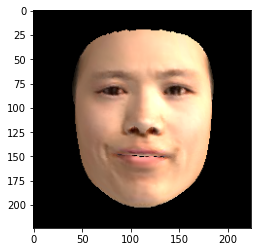

In [23]:
#     param = data['param'].cuda()
param = torch.from_numpy(param).cuda()
albedo = torch.from_numpy(albedo).cuda()
x = model(param, albedo).cuda().float()
plt.imshow(x.detach().squeeze().cpu().numpy())

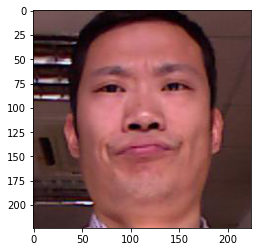

In [14]:
plt.imshow(io.imread('../eval_data/results/facewarehouse/Tester_2_pose_15_img.jpg'))